<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=119152283" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## SharkTank US Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Feb-14


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

### Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

### Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 176
-rw-r--r-- 1 nobody nogroup 179205 Feb 14 14:02 'Shark Tank US dataset.csv'

There are 995 rows and 40 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number  Episode Number  Pitch Number              Startup Name  \
0              1               1             1            AvaTheElephant   
1              1               1             2        Mr.Tod'sPieFactory   
2              1               1             3                   Wispots   
3              1               1             4  CollegeFoxesPackingBoxes   
4              1               1             5                  IonicEar   

            Industry                             Business Description  \
0    Health/Wellness           Ava The Elephant - Baby and Child Care   
1  Food and Beverage           Mr. Tod's Pie Factory - Specialty Food   
2  Business Services                      Wispots - Consumer Services   
3     Lifestyle/Home  College Foxes Packing Boxes - Consumer Services   
4      Software/Tech                            Ionic Ear - Novelties   

  Pitchers Gender Pitchers State Pitchers City           Entrepreneur Names  \
0          Female             GA       Atlanta              Tiffany Krumins   
1            Male             NJ      Somerset                   Tod Wilson   
2            Male             NC          Cary               Kevin Flannery   
3            Male             FL         Tampa  Nick Friedman, Omar Soliman   
4            Male             MN      St. Paul               Darrin Johnson   

                       Company Website  Multiple Entrepreneurs  US Viewers  \
0       http://www.avatheelephant.com/                     0.0         NaN   
1                  http://whybake.com/                     0.0         NaN   
2              http://www.wispots.com/                     0.0         NaN   
3  http://collegehunkshaulingjunk.com/                     0.0         NaN   
4                                  NaN                     0.0         NaN   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0              50000.0                     15.0             333333.0   
1             460000.0                     10.0            4600000.0   
2            1200000.0                     10.0           12000000.0   
3             250000.0                     25.0            1000000.0   
4            1000000.0                     15.0            6666667.0   

   Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
0         1            50000.0               55.0         90909.0   
1         1           460000.0               50.0        920000.0   
2         0                NaN                NaN             NaN   
3         0                NaN                NaN             NaN   
4         0                NaN                NaN             NaN   

   Number of sharks in deal  Investment Amount Per Shark  Royalty Deal  Loan  \
0                       1.0                      50000.0           NaN   NaN   
1                       2.0                     230000.0           NaN   NaN   
2                       NaN                          NaN           NaN   NaN   
3                       NaN                          NaN           NaN   NaN   
4                       NaN                          NaN           NaN   NaN   

   Barbara Corcoran Investment Amount  Mark Cuban Investment Amount  \
0                             50000.0                           NaN   
1                            230000.0                           NaN   
2                                 NaN                           NaN   
3                                 NaN                           NaN   
4                                 NaN                           NaN   

   Lori Greiner Investment Amount  Robert Herjavec Investment Amount  \
0                             NaN                                NaN   
1                             NaN                                NaN   
2                             NaN                                NaN   
3                             NaN                                NaN   
4                             NaN              

In [6]:
shark_tank.tail(10).T

985              986  \
Season Number                                            11               11   
Episode Number                                           23               23   
Pitch Number                                            986              987   
Startup Name                             SlateChocolateMilk      RescueReady   
Industry                                  Food and Beverage   Lifestyle/Home   
Business Description                Slate Chocolate Milk -   Rescue Ready -    
Pitchers Gender                                        Male             Male   
Pitchers State                                          NaN              NaN   
Pitchers City                                           NaN              NaN   
Entrepreneur Names                                      NaN              NaN   
Company Website                                         NaN              NaN   
Multiple Entrepreneurs                                  NaN              NaN   
US Viewers                                              NaN              NaN   
Original Ask Amount                                400000.0          75000.0   
Original Offered Equity                                10.0             15.0   
Valuation Requested                               4000000.0         500000.0   
Got Deal                                                  0                0   
Total Deal Amount                                       NaN              NaN   
Total Deal Equity                                       NaN              NaN   
Deal Valuation                                          NaN              NaN   
Number of sharks in deal                                NaN              NaN   
Investment Amount Per Shark                             NaN              NaN   
Royalty Deal                                            NaN              NaN   
Loan                                                    NaN              NaN   
Barbara Corcoran Investment Amount                      NaN              NaN   
Mark Cuban Investment Amount                            NaN              NaN   
Lori Greiner Investment Amount                          NaN              NaN   
Robert Herjavec Investment Amount                       NaN              NaN   
Daymond John Investment Amount                          NaN              NaN   
Kevin O Leary Investment Amount                         NaN              NaN   
Guest Investment Amount                                 NaN              NaN   
Barbara Corcoran Present                                NaN              NaN   
Mark Cuban Present                                      NaN              NaN   
Lori Greiner Present                                    NaN              NaN   
Robert Herjavec Present                                 NaN              NaN   
Daymond John Present                                    NaN              NaN   
Kevin O Leary Present                                   NaN              NaN   
Kevin Harrington Present                                NaN              NaN   
Guest Name                                              NaN              NaN   
Notes                                                   NaN              NaN   

                                                        987  \
Season Number                                            11   
Episode Number                                           24   
Pitch Number                                            988   
Startup Name                             YellowLeafHammocks   
Industry                            Fitness/Sports/Outdoors   
Business Description                Yellow Leaf Hammocks -    
Pitchers Gender                                  Mixed Team   
Pitchers State                                          NaN   
Pitchers City                                           NaN   
Entrepreneur Names                                      NaN   
Company Website                                         NaN   
Multiple Entreprene

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10)

Season Number  Episode Number  Pitch Number              Startup Name  \
581              7              22           582            TheGoodPromise   
277              5               4           278  RDubsSundayNightSlowJams   
544              7              13           545             HungryHarvest   
610              7              29           611                    Pavlok   
84               2               6            85                 SweepEasy   
924             11               8           925                     Outer   
394              6               4           395                TableJacks   
165              4               2           166                   CateApp   
229              4              18           230            NeoInnovations   
413              6               9           414                 Pipsnacks   

              Industry                               Business Description  \
581  Food and Beverage                                The Good Promise -    
277     Lifestyle/Home      R Dubs Sunday Night Slow Jams - Entertainment   
544  Food and Beverage                                  Hungry Harvest -    
610    Uncertain/Other  Pavlok - uses operant conditioning through hap...   
84      Lifestyle/Home         Sweep Easy - Storage and Cleaning Products   
924     Lifestyle/Home                                           Outer -    
394     Lifestyle/Home                            Table Jacks - Novelties   
165      Software/Tech                              CateApp - Mobile Apps   
229    Health/Wellness             Neo Innovations - Homeopathic Remedies   
413  Food and Beverage                         Pipsnacks - Specialty Food   

    Pitchers Gender Pitchers State  Pitchers City  \
581          Female            NaN            NaN   
277            Male             CA      San Diego   
544            Male            NaN            NaN   
610            Male             MA            NaN   
84             Male             AZ     Scottsdale   
924            Male            NaN            NaN   
394            Male             TX        Houston   
165            Male             CA  San Francisco   
229            Male             CO    Westminster   
413      Mixed Team             NY         Harlem   

               Entrepreneur Names              Company Website  \
581                           NaN                          NaN   
277                           NaN      http://www.slowjams.com   
544                           NaN                          NaN   
610                           NaN                          NaN   
84                  Shane Pannell     http://buysweepeasy.com/   
924                           NaN                          NaN   
394                           NaN    http://www.tablejacks.com   
165                    Neal Desai                          NaN   
229  Nick Gonzales and Kevin Mack  http://neomagneticlight.com   
413      Jeff and Jennifer Martin    http://www.pipsnacks.com/   

     Multiple Entrepreneurs  US Viewers  Original Ask Amount  \
581                    <NA>         NaN             100000.0   
277                       0         NaN              75000.0   
544                    <NA>         NaN              50000.0   
610                    <NA>         NaN             500000.0   
84                        0         NaN              40000.0   
924                    <NA>         NaN             750000.0   
394                       0         NaN             100000.0   
165                       0         NaN              50000.0   
229                       1         NaN              80000.0   
413                       1         NaN             200000.0   

     Original Offered Equity  Valuation Requested  Got Deal  \
581                     20.0             500000.0         0   
277                     10.0             750000.0         0   
544                      5.0            1000000.0         1   
610                      3.1  

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       995 non-null    Int32  
 1   Episode Number                      995 non-null    Int32  
 2   Pitch Number                        995 non-null    Int32  
 3   Startup Name                        995 non-null    object 
 4   Industry                            995 non-null    object 
 5   Business Description                995 non-null    object 
 6   Pitchers Gender                     991 non-null    object 
 7   Pitchers State                      734 non-null    object 
 8   Pitchers City                       495 non-null    object 
 9   Entrepreneur Names                  423 non-null    object 
 10  Company Website                     432 non-null    object 
 11  Multiple Entrepreneurs              495 non-n

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 12
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 995
Number of unique values in Startup Name - 993
Number of unique values in Industry - 15
Number of unique values in Business Description - 993
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers City - 249
Number of unique values in Entrepreneur Names - 421
Number of unique values in Company Website - 430
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewers - 2
Number of unique values in Original Ask Amount - 72
Number of unique values in Original Offered Equity - 44
Number of unique values in Valuation Requested - 158
Number of unique values in Got Deal - 2
Number of unique values in Total Deal Amount - 63
Number of unique values in Total Deal Equity - 55
Number of unique values in Deal Valuation - 168
Number of unique values in Number

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

12 seasons 

995 startup companies came for pitching 



In [13]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [14]:
# Types of industries, came for investments
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=800, height=800)
fig.update_yaxes(title_text="")
fig.show()

Food and Beverage          202
Fashion/Beauty             178
Lifestyle/Home             159
Children/Education         102
Fitness/Sports/Outdoors    101
Software/Tech               63
Health/Wellness             48
Pet Products                43
Business Services           29
Media/Entertainment         23
Automotive                  12
Green/CleanTech             11
Travel                      11
Uncertain/Other              9
nan                          4
Name: Industry, dtype: int64


In [15]:
# Gender wise
shark_tank['Pitchers Gender'].value_counts()

Male          584
Female        245
Mixed Team    162
Name: Pitchers Gender, dtype: int64

### 💹 57% companies received offers and 43% startups could not convince Sharks to invest

1    564
0    431
Name: Got Deal, dtype: int64 

1    57%
0    43%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

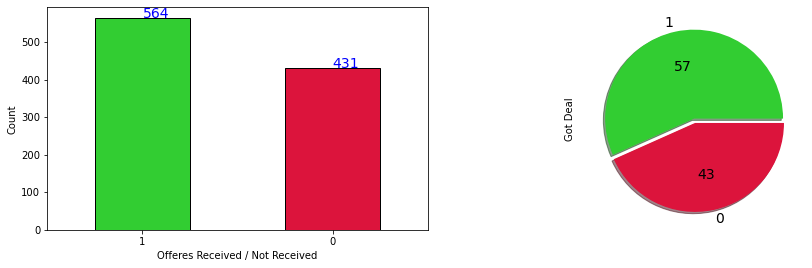

In [16]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offeres Received / Not Received")
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 564 companies received offers & 431 startups could not convince #Sharks to invest.

In [17]:
# Maximum amount requested, by a pitcher
print(format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

$5,000,000


In [18]:
# Least amount requested, by a pitcher
print(format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

$10,000


In [19]:
# Sum of investment amount asked, by all startup companies, in Shark Tank
print(format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

$278,507,000


In [20]:
# Amount invested by all sharks, in Shark Tank US
print(format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

$162,854,666


In [21]:
# # Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount", text=tmpdf['Total Deal Amount'].map(int).map(str))
fig.show()

Startup Name
AirCar                         5000000.0
MokiDoorstep                   3000000.0
SynDaverLabs                   3000000.0
Zipz                           2500000.0
Fizzics                        2000000.0
TenThirtyOneHauntedHayrides    2000000.0
Vengo                          2000000.0
RuggedManiac                   1750000.0
BeyondSushi                    1500000.0
Sworkit                        1500000.0
XCraft                         1500000.0
Trunkster                      1400000.0
HyConn                         1250000.0
Jackson'sHonest                1250000.0
TheRedDressBoutique            1200000.0
Name: Total Deal Amount, dtype: float64


In [22]:
# Top 15 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
Turbobaster             100.0
WineBalloon             100.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
Name: Total Deal Equity, dtype: float64


In [23]:
# Startups who got Debt/loan amount
print(shark_tank['Loan'].sum())
shark_tank.loc[shark_tank['Loan'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

37.0


Season Number                Startup Name  Original Ask Amount  \
272              5            RapidRamenCooker             300000.0   
289              5  BetterLifeCleaningProducts             400000.0   
291              5          PaparazziProposals             250000.0   
299              5  Grace&LaceKnittedBootSocks             175000.0   
300              5    YuboCustomizedLunchBoxes             150000.0   
433              6       Scratch&GrainBakingCo             150000.0   
459              6                    CocoJack             125000.0   
520              7               SavvyNaturals             200000.0   
563              7                     Sworkit            1500000.0   
571              7                  BetterBack             750000.0   
580              7                       Vengo            2000000.0   
586              7                     Coolbox             500000.0   
621              8                      TekDry             500000.0   
622              8              NightRunner270             250000.0   
636              8                   StyleClub             500000.0   
640              8   Jack'sStands&Marketplaces              50000.0   
642              8                        Toor             500000.0   
647              8                     Inboard             750000.0   
651              8               SealedbySanta             150000.0   
670              8               Dbestproducts             350000.0   
684              8        BlentiqueWineCompany             250000.0   
686              8                    Rareform             300000.0   
703              8                 Wine&Design             500000.0   
733              9                    WaiveCar             500000.0   
753              9                  EverlyWell            1000000.0   
754              9                        Mush             300000.0   
759              9                     Frywall             100000.0   
764              9                     Stasher             400000.0   
791              9                GunnarOptiks             750000.0   
845             10            MakeupJunkieBags             200000.0   
899             11                 BoostOxygen            1000000.0   
924             11                       Outer             750000.0   
931             11                  Flexscreen             800000.0   
955             11                      Bohana             200000.0   
956             11              BohoCamperVans             300000.0   
959             11                       Goumi            1000000.0   
974             11                MuralPainter             300000.0   

     Total Deal Amount  Total Deal Equity  
272           300000.0              15.00  
289           400000.0              17.00  
291           250000.0              33.00  
299           175000.0              10.00  
300           150000.0              20.00  
433           150000.0              20.00  
459           125000.0              25.00  
520           200000.0              40.00  
563          1500000.0              10.00  
571           750000.0               7.50  
580          2000000.0              10.00  
586           500000.0              15.00  
621           500000.0               5.00  
622           200000.0              15.00  
636           500000.0              22.00  
640                NaN                NaN  
642           500000.0              10.00  
647           750000.0               4.00  
651           150000.0              20.00  
670           350000.0              20.00  
684           250000.0              10.00  
686           300000.0              10.00  
703           500000.0              10.00  
733           500000.0               2.00  
753          1000000.0               5.00  
754           300000.0              10.00  
759           100000.0              10.00  
764           400000.0              15.00  
791           750000.0        

## 💰 Which shark invested most ?

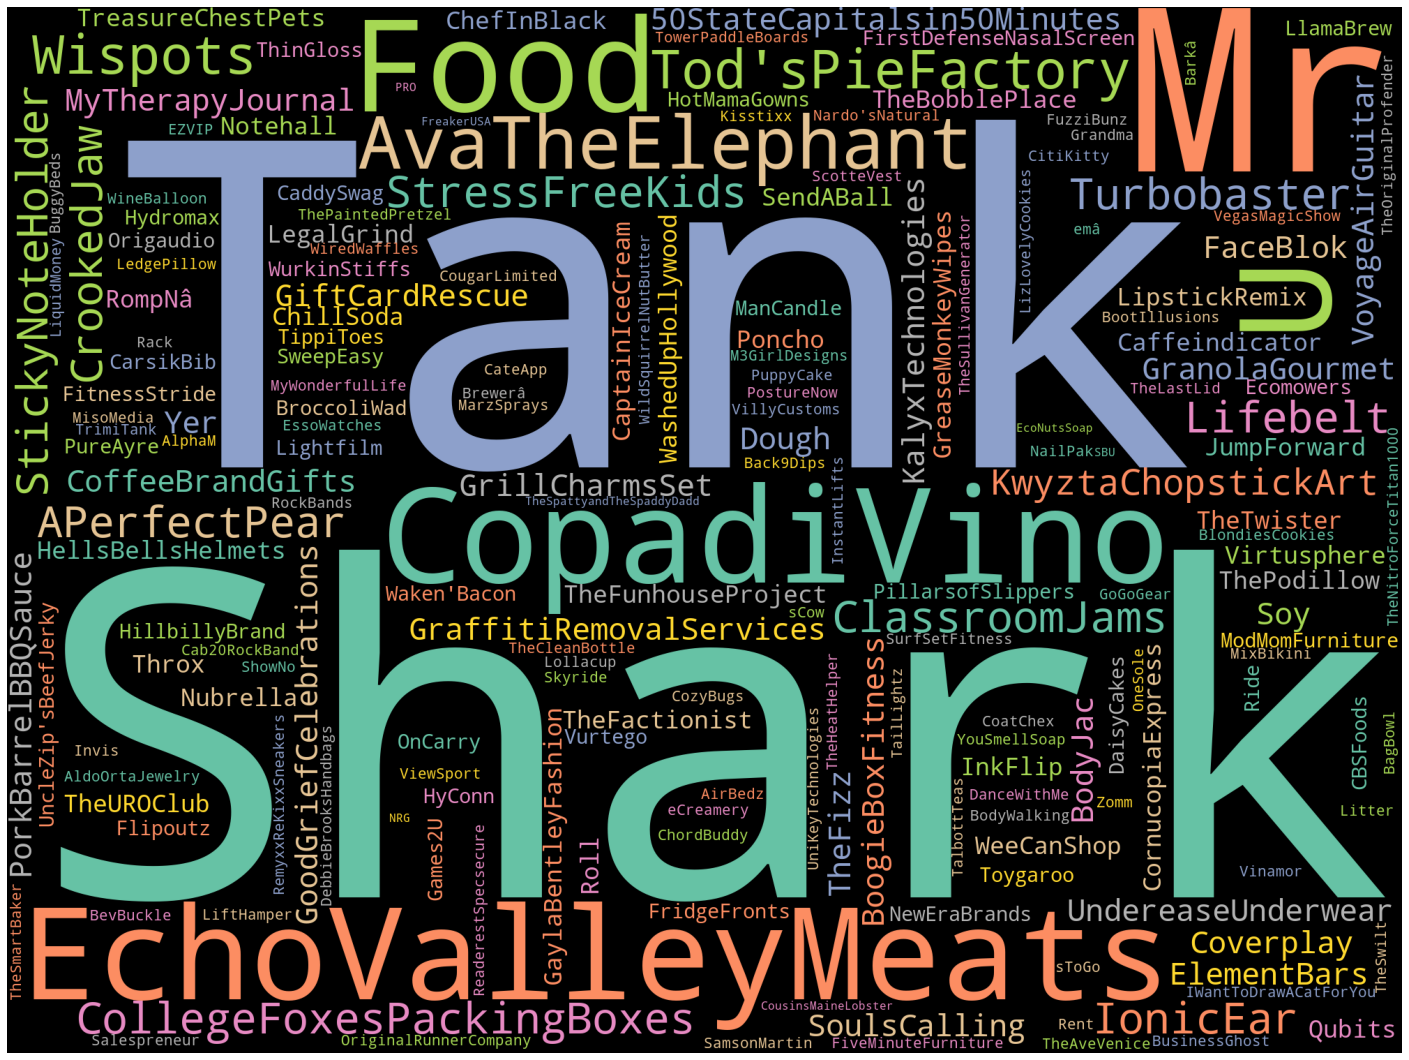

In [24]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

1.0    411
2.0    121
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    22%
3.0     3%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


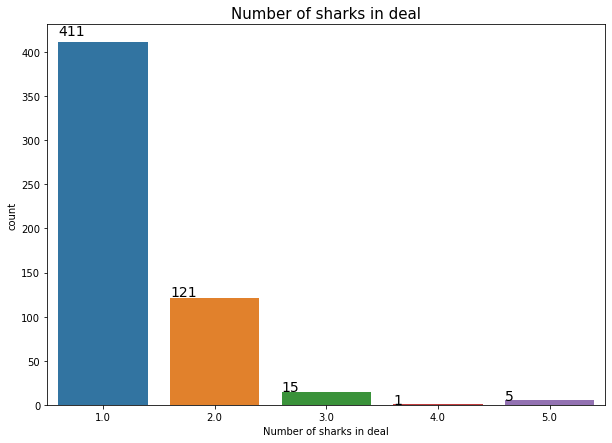

In [25]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in deal", fontsize=15)
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [26]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                1  ClassroomJams           250000.0              100.0
161              4      BuggyBeds           250000.0               25.0
268              5   Breathometer          1000000.0               30.0
514              7         XCraft          1500000.0               25.0
814             10    CupBoardPro           100000.0               20.0


In [27]:
shark_tank['Number of sharks in deal'].value_counts()

1.0    411
2.0    121
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64

## Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 92
Investment amount by Barbara Corcoran $13,140,000
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet Products                             50000.0
                   Notehall           Sof

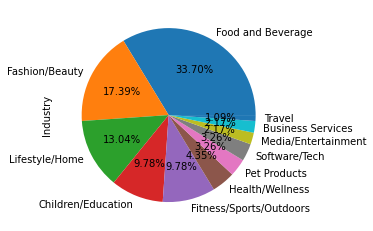

In [28]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-2:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 68
Investment amount by Mark Cuban $41,310,000
---------------------------------------------------------------------------
               Startup Name                Industry  Mark Cuban Investment Amount
              ClassroomJams      Children/Education                  5.000000e+04
                  TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                   Toygaroo      Children/Education                  1.000000e+05
    FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                     HyConn         Uncertain/Other                  1.250000e+06
                      EZVIP     Media/Entertainment                  7.500000e+04
             TheCleanBottle       Food and Beverage                  6.000000e+04
      IWantToDrawACatForYou           Software/Tech                  2.500000e+04
                WineBalloon       Food and Beverage                  4.000000e+05
              M3GirlDesig

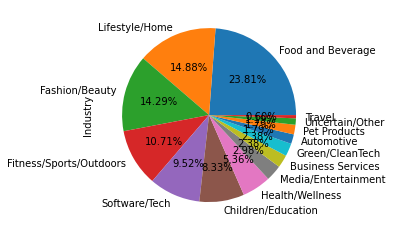

In [29]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-2:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 40
Investment amount by Lori Greiner $28,687,500
---------------------------------------------------------------------------
              Startup Name                Industry  Lori Greiner Investment Amount
                    ShowNo          Fashion/Beauty                     75000.00000
             M3GirlDesigns          Fashion/Beauty                    100000.00000
       ReaderestSpecsecure          Lifestyle/Home                    150000.00000
                   NailPak          Fashion/Beauty                     50000.00000
                   BagBowl          Lifestyle/Home                     40000.00000
                 Back9Dips       Food and Beverage                     75000.00000
                MarzSprays         Health/Wellness                    200000.00000
                ScrubDaddy          Lifestyle/Home                    200000.00000
              TheCoolWazoo      Children/Education                     65000.00000
           

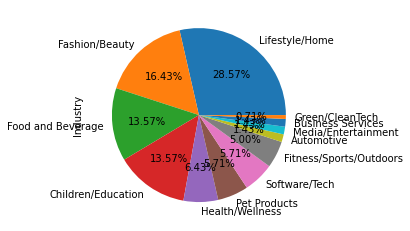

In [30]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-2:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

In [31]:
# US states of pitcher's
print(shark_tank['Pitchers State'].value_counts(), "\n")

CA        207
NY         70
TX         55
FL         47
IL         31
GA         23
UT         23
CO         23
MA         21
PA         20
NC         19
OR         19
OH         19
WA         15
NJ         13
AZ         13
VA         10
MI          9
NV          9
CT          7
DC          6
MO          6
MN          6
TN          5
IN          5
MD          5
VT          4
OK          4
HI          4
WI          4
SC          4
KS          3
MS          3
LA          3
ID          3
RI          3
AR          2
KY          2
AL          2
NE          1
NH          1
IA          1
MT          1
DE          1
AK          1
Canada      1
Name: Pitchers State, dtype: int64 



In [32]:
# Top 20 cities
print(shark_tank['Pitchers City'].value_counts().nlargest(20), "\n")

Los Angeles       41
New York          30
San Francisco     25
Chicago           14
Austin            13
Atlanta           11
Portland          10
San Diego         10
Dallas             8
Houston            5
Boston             5
Miami              5
Tampa              5
Denver             5
Pittsburgh         5
Provo              4
Las Vegas          4
Salt Lake City     4
Washington         4
Philadelphia       4
Name: Pitchers City, dtype: int64 



In [33]:
# Many (90+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name  Original Ask Amount  Total Deal Amount
15             GiftCardRescue             150000.0           200000.0
30              Soy-Yer-Dough             125000.0           300000.0
43                JumpForward             150000.0           600000.0
64               WurkinStiffs              85000.0           100000.0
65                  TippiToes              30000.0           100000.0
..                        ...                  ...                ...
925  Mrs.Goldfarb'sUnrealDeli             100000.0           250000.0
937        WisePocketProducts              30000.0            35000.0
940               GeniusJuice             250000.0           500000.0
944               BalaBangles             400000.0           900000.0
987        YellowLeafHammocks             400000.0          1000000.0

[97 rows x 3 columns]

In [34]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Startup Name","Original Offered Equity","Total Deal Equity"]]

Startup Name  Original Offered Equity  Total Deal Equity
0        AvaTheElephant                     15.0               55.0
1    Mr.Tod'sPieFactory                     10.0               50.0
5          APerfectPear                     15.0               50.0
6         ClassroomJams                     10.0              100.0
10          Turbobaster                     35.0              100.0
..                  ...                      ...                ...
984           MCSquares                     10.0               25.0
987  YellowLeafHammocks                      7.0               25.0
988       DreamlandBaby                     10.0               22.5
989        RollinGreens                     10.0               20.0
990      TheMadOptimist                     10.0               20.0

[467 rows x 3 columns]

In [35]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name  Valuation Requested  Deal Valuation
51   GreaseMonkeyWipes             100000.0        100000.0
60              Qubits             176471.0        176471.0
78     Ride-OnCarry-On             200000.0        200000.0
85          DaisyCakes             200000.0        200000.0
92              HyConn            1250000.0       1250000.0
..                 ...                  ...             ...
908       BugBiteThing            1500000.0       1500000.0
915             EZCPak            2500000.0       2500000.0
933         SlumberPod            2000000.0       2000000.0
954   TheSpaceTraveler             300300.0        300300.0
961     CritterPricker             766667.0        766667.0

[86 rows x 3 columns]

In [36]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name  Valuation Requested  Deal Valuation
30                   Soy-Yer-Dough             500000.0        588235.0
31                  GrillCharmsSet             200000.0        250000.0
77                  HillbillyBrand             200000.0        300000.0
84                       SweepEasy             160000.0        227273.0
104          IWantToDrawACatForYou              40000.0         75758.0
112                    WineBalloon             133333.0        400000.0
113                         ShowNo             200000.0        300000.0
149                  BootIllusions             333333.0       1250000.0
232                         Lose12             480000.0        500000.0
268                   Breathometer            2500000.0       3333333.0
276  HamboardsSkateboard/Surfboard             666667.0       1000000.0
285                   FiberFixTape             900000.0       2083333.0
323             TheCookieDoughCafe             250000.0        333333.0
324                     Cycloramic            1800000.0       3333333.0
336                     RevoLights            1500000.0       3000000.0
400               BeatBoxBeverages            2000000.0       3030303.0
436                          Lumio            3125000.0       3500000.0
444                    DrainStrain             733333.0       1100000.0
491                     SharkWheel            2000000.0       3000000.0
502                       Loliware            1500000.0       2400000.0
514                         XCraft            2500000.0       6000000.0
517                    Windcatcher            2500000.0       4000000.0
580                          Vengo           16000000.0      20000000.0
582                     Wondercide           10000000.0      16666667.0
654                  HandOutGloves             750000.0       1200000.0
671                      Tranquilo            1000000.0       1333333.0
675                        Toymail           10000000.0      12000000.0
721                      IceShaker             666667.0       1000000.0
744                      DNASimple             800000.0       1333333.0
775                     RounderBum            1500000.0       3000000.0
788                        Radiate             250000.0        400000.0
829                       Oatmeals            2500000.0      15000000.0
831                       PopItPal            2500000.0       5000000.0
845               MakeupJunkieBags            1333333.0       4000000.0
852                        SubSafe             384615.0        400000.0
912                       Myostorm            1500000.0       3000000.0
925       Mrs.Goldfarb'sUnrealDeli            1000000.0       1250000.0
935                  KreylEssence            4000000.0       8000000.0

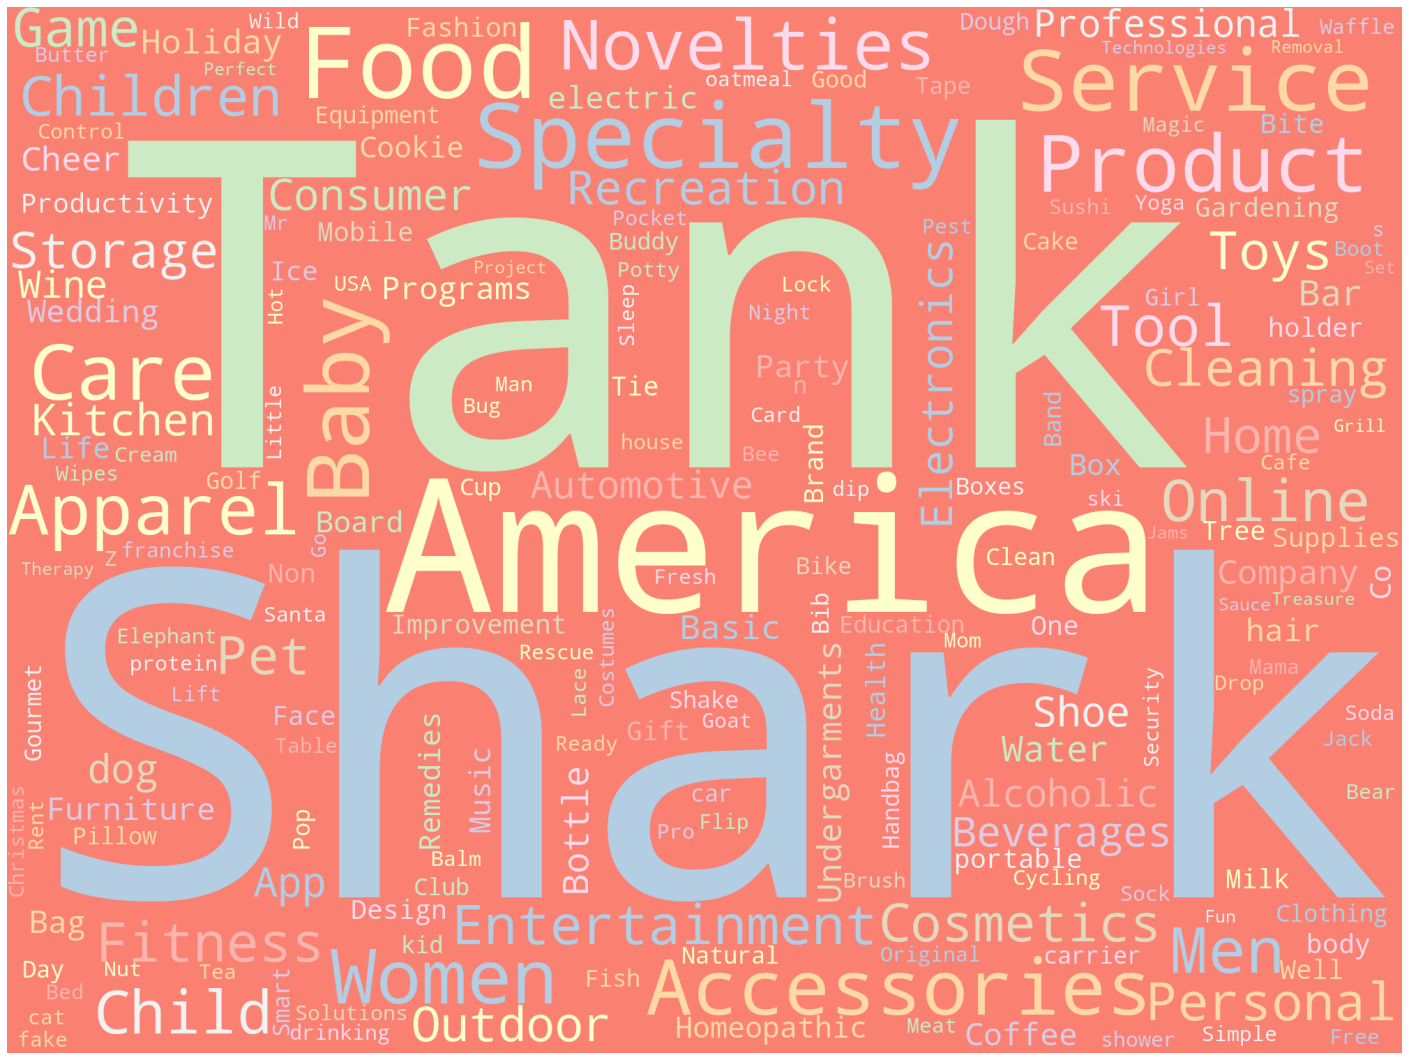

In [37]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [38]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [39]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.2
# seaborn version: 0.11.2
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.2
seaborn version: 0.11.2
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [40]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Season Number  Episode Number  Pitch Number               Startup Name  \
640              8               8           641  Jack'sStands&Marketplaces   
991             12               1           992               Touch Up Cup   
992             12               1           993                SparkCharge   

               Industry             Business Description Pitchers Gender  \
640  Children/Education  Jack's Stands & Marketplaces -             Male   
991                 nan                paint storage cup             NaN   
992                 nan    portable electric car charger             NaN   

    Pitchers State Pitchers City Entrepreneur Names Company Website  \
640             CO           NaN                NaN             NaN   
991            NaN           NaN                NaN             NaN   
992            NaN           NaN                NaN             NaN   

     Multiple Entrepreneurs  US Viewers  Original Ask Amount  \
640                    <NA>         NaN              50000.0   
991                    <NA>        4.03                  NaN   
992                    <NA>        4.03                  NaN   

     Original Offered Equity  Valuation Requested  Got Deal  \
640                     10.0             500000.0         1   
991                      NaN                  NaN         1   
992                      NaN                  NaN         1   

     Total Deal Amount  Total Deal Equity  Deal Valuation  \
640                NaN                NaN             NaN   
991                NaN                NaN             NaN   
992                NaN                NaN             NaN   

     Number of sharks in deal  Investment Amount Per Shark  Royalty Deal  \
640                       1.0                          0.0           NaN   
991                       NaN                          NaN           NaN   
992                       NaN                          NaN           NaN   

     Loan  Barbara Corcoran Investment Amount  Mark Cuban Investment Amount  \
640   1.0                                 NaN                           NaN   
991   NaN                                 NaN                           NaN   
992   NaN                                 NaN                           NaN   

     Lori Greiner Investment Amount  Robert Herjavec Investment Amount  \
640                             NaN                                NaN   
991                             NaN                                NaN   
992                             NaN                                NaN   

     Daymond John Investment Amount  Kevin O Leary Investment Amount  \
640                             NaN                              NaN   
991                             NaN                              NaN   
992                             NaN                              NaN   

     Guest Investment Amount  Barbara Corcoran Present  Mark Cuban Present  \
640                      0.0                       1.0                 1.0   
991                      NaN                       NaN                 NaN   
992                      NaN                       NaN                 NaN   

     Lori Greiner Present  Robert Herjavec Present  Daymond John Present  \
640                   1.0                      0.0                   0.0   
991                   NaN                      NaN                   NaN   
992                   NaN                      NaN                   NaN   

     Kevin O Leary Present  Kevin Harrington Present   Guest Name  \
640                    1.0                       1.0  Chris Sacca   
991                    NaN                       NaN          NaN   
992                    NaN                       NaN          NaN   

                                 Notes  
640  2% interest loan from Chris Sacca  
991                                NaN  
992                                NaN

In [41]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Season Number  Episode Number  Pitch Number               Startup Name  \
10               1               3            11                Turbobaster   
26               1               6            27                ElementBars   
55               1              13            56             Caffeindicator   
72               2               3            73            ModMomFurniture   
98               2               9            99                  CitiKitty   
129              3               8           130             Nardo'sNatural   
352              5              23           353                  HappyFeet   
456              6              20           457                    Scholly   
834             10               8           835                     Mother   
841             10              10           842                   Pristine   
844             10              11           845                 KittyKasas   
883             10              21           884  TheBestPocketSqaureHolder   
991             12               1           992               Touch Up Cup   
992             12               1           993                SparkCharge   

                    Industry  \
10         Food and Beverage   
26   Fitness/Sports/Outdoors   
55         Food and Beverage   
72            Lifestyle/Home   
98              Pet Products   
129           Fashion/Beauty   
352           Fashion/Beauty   
456       Children/Education   
834        Food and Beverage   
841          Health/Wellness   
844             Pet Products   
883           Fashion/Beauty   
991                      nan   
992                      nan   

                                  Business Description Pitchers Gender  \
10                         Turbobaster - Kitchen Tools          Female   
26                       Element Bars - Specialty Food            Male   
55                          Caffeindicator - Novelties            Male   
72                       Mod Mom Furniture - Furniture          Female   
98                            CitiKitty - Pet Products          Female   
129      Nardo's Natural - Personal Care and Cosmetics            Male   
352                             Happy Feet - Novelties            Male   
456                          Scholly - Online Services            Male   
834                 Mother - apple cider vinegar drink      Mixed Team   
841                        Pristine - cleansing sprays      Mixed Team   
844                           Kitty Kasas - cat houses      Mixed Team   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   
991                                  paint storage cup             NaN   
992                      portable electric car charger             NaN   

    Pitchers State  Pitchers City            Entrepreneur Names  \
10              CA  San Francisco                   Marian Cruz   
26              IL        Chicago               Jonathan Miller   
55              PA        Mt. Joy             Michael Schiavone   
72              AZ      Flagstaff             Kiersten Hathcock   
98              PA    Morrisville               Rebecca Rescate   
129             FL     Clearwater  Kyle, KJ, Danny and DJ Nardo   
352             KY     Louisville                     Pat Yates   
456             PA   Philadelphia              Christopher Gray   
834             TX            NaN                           NaN   
841             TX            NaN                           NaN   
844            NaN            NaN                           NaN   
883             MO            NaN                           NaN   
991            NaN            NaN                           NaN   
992            NaN            NaN                           NaN   

                     Company Website  Multiple Entrepreneurs  US Viewers  \
10                               NaN                       0         NaN   
26       http://www.elementbars.com/                       0         